In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.express as px

plt.rcParams['figure.figsize'] = [20, 16]
sns.set_style('darkgrid')

In [2]:
# Load Iris Dataset
dataset = pd.read_csv('/kaggle/input/irisdataset/Iris.csv')
# Remove the id column as it's neither a dependent nor independent variable
dataset = dataset.drop(columns=['Id'])

# Generate profile report
"""
profile = ProfileReport(dataset)
profile.to_file(output_file='report.html')
"""

# Display top 5 rows of Iris Dataset
# dataset.info()
display(dataset.head(5))
print(dataset.shape)
# Obtain the columns corresponding to independent features
FEATURES_LIST = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[FEATURES_LIST]
# Obtain the columns corresponding to dependent features
Y = dataset[['Species']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)


In [3]:
# Missing value check
print(dataset.isnull().sum())

# Encode categorical variables with Label encoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y['Species'])

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [4]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


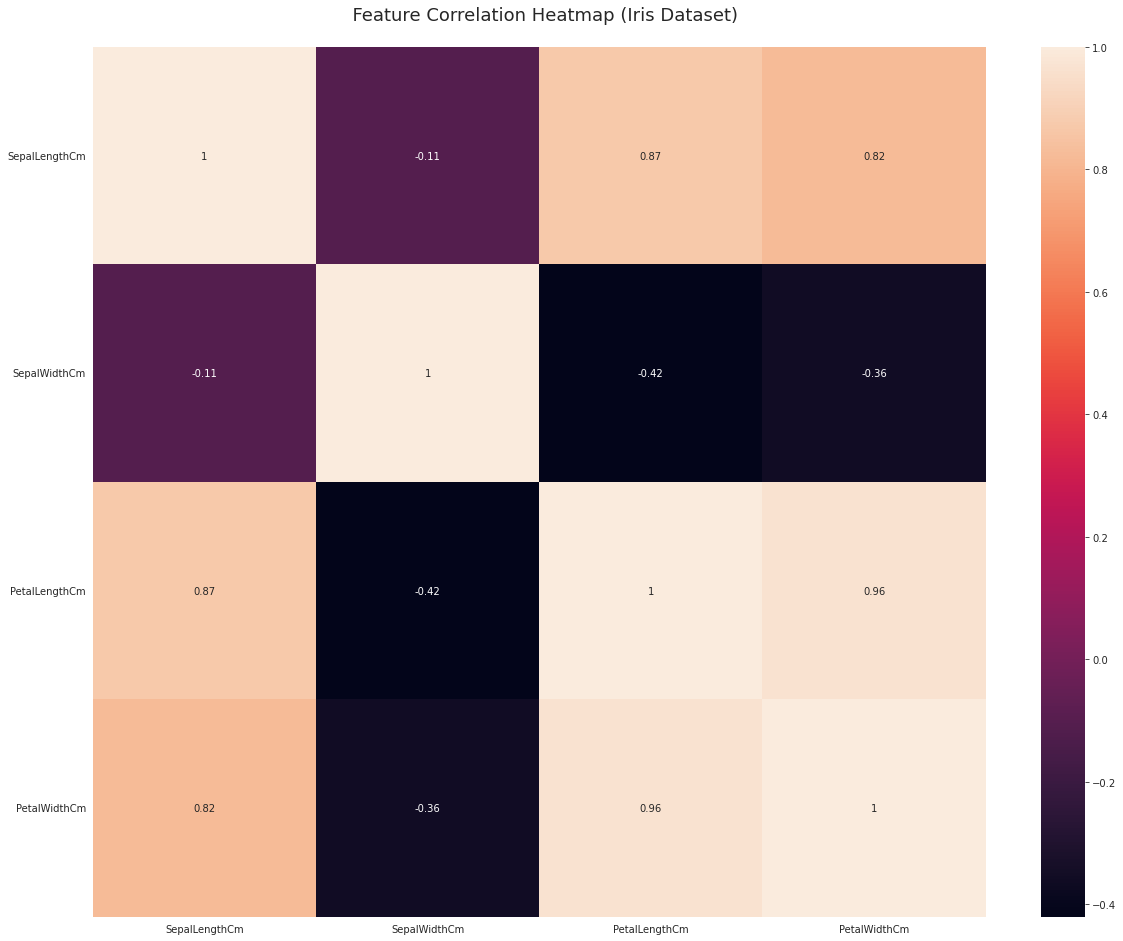

In [5]:
corr = X.corr()

heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0) 
heatmap.set_title('  Feature Correlation Heatmap (Iris Dataset)\n', fontsize=18)
plt.show()

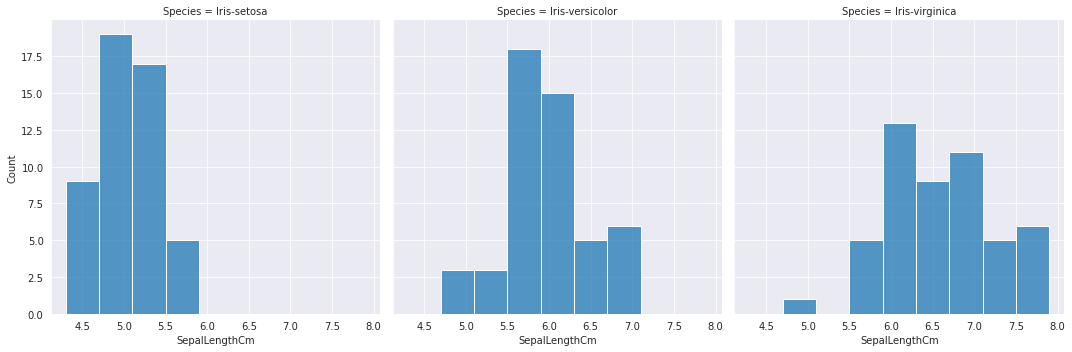

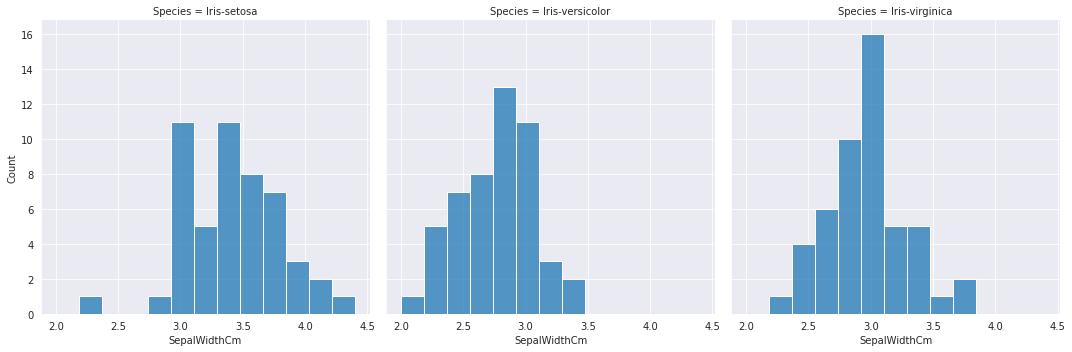

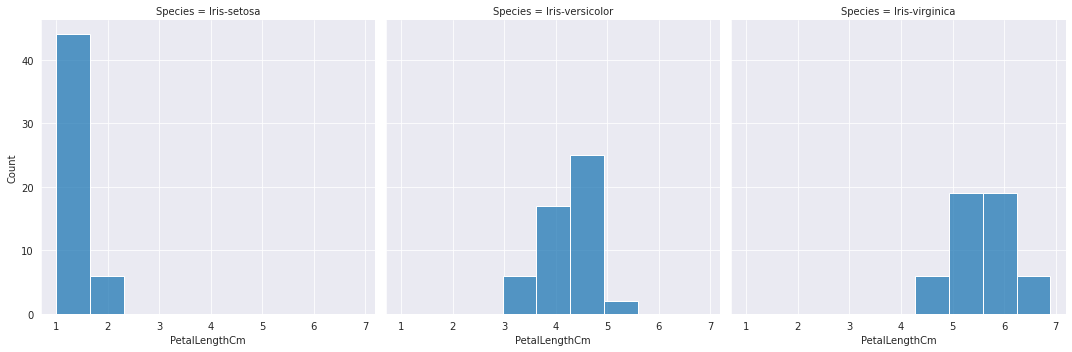

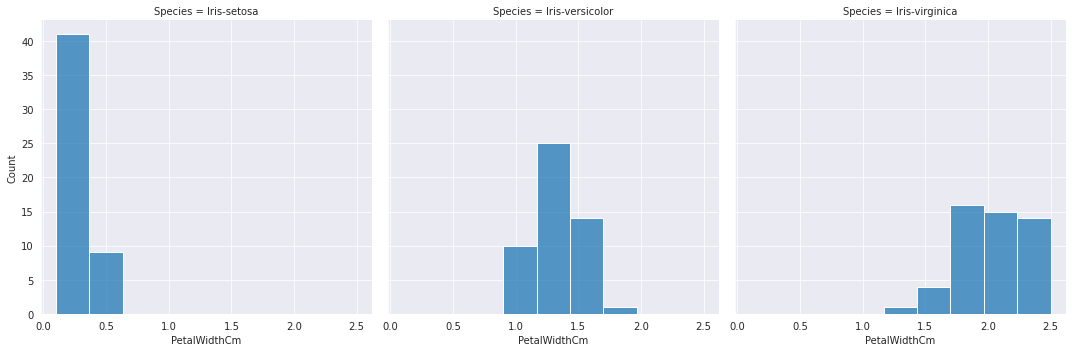

In [6]:
# Perform basic exploratory analysis of the dataset
for feature in FEATURES_LIST:
    plot = sns.displot(data=dataset, x=feature, col='Species')
    plt.show()

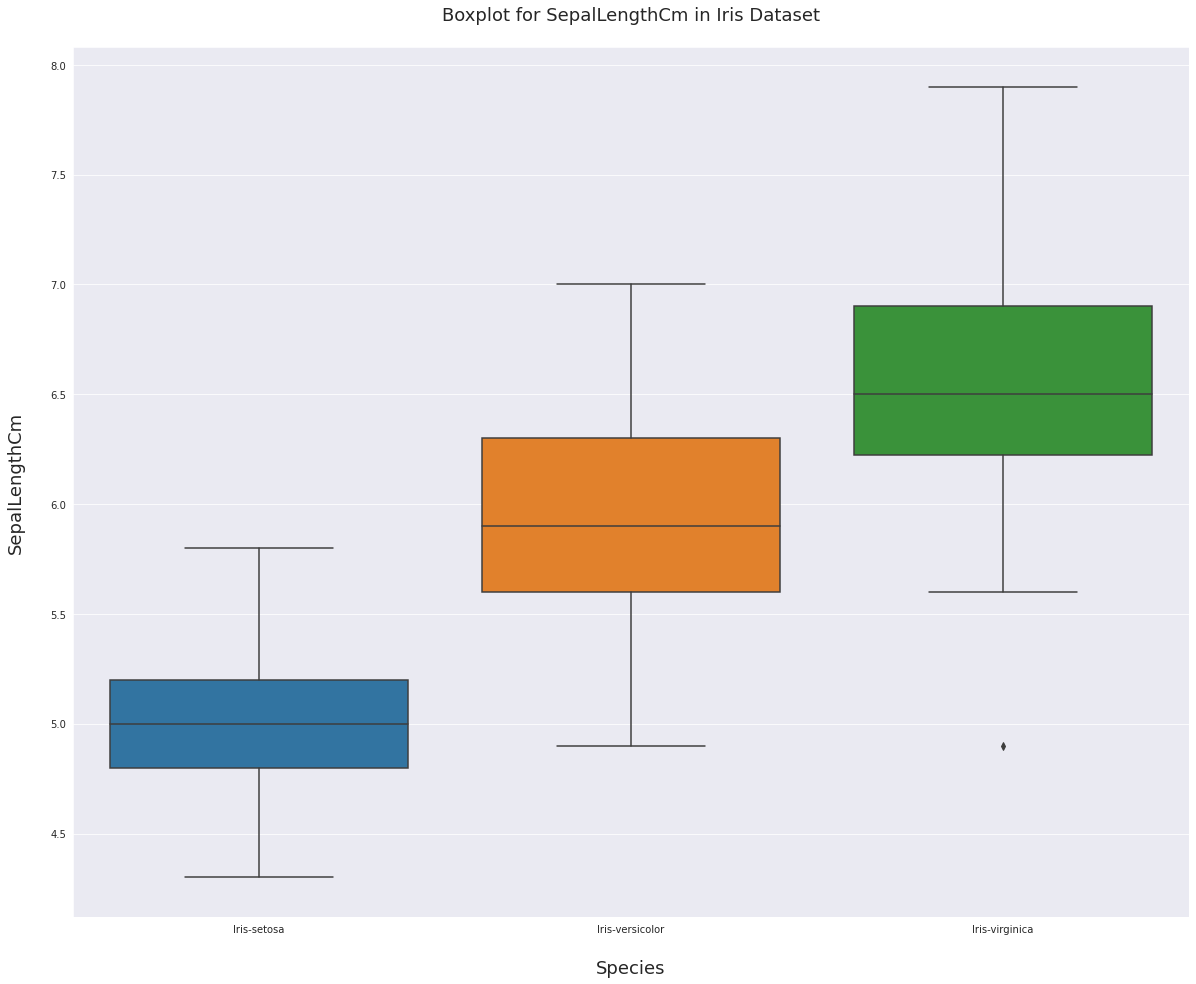

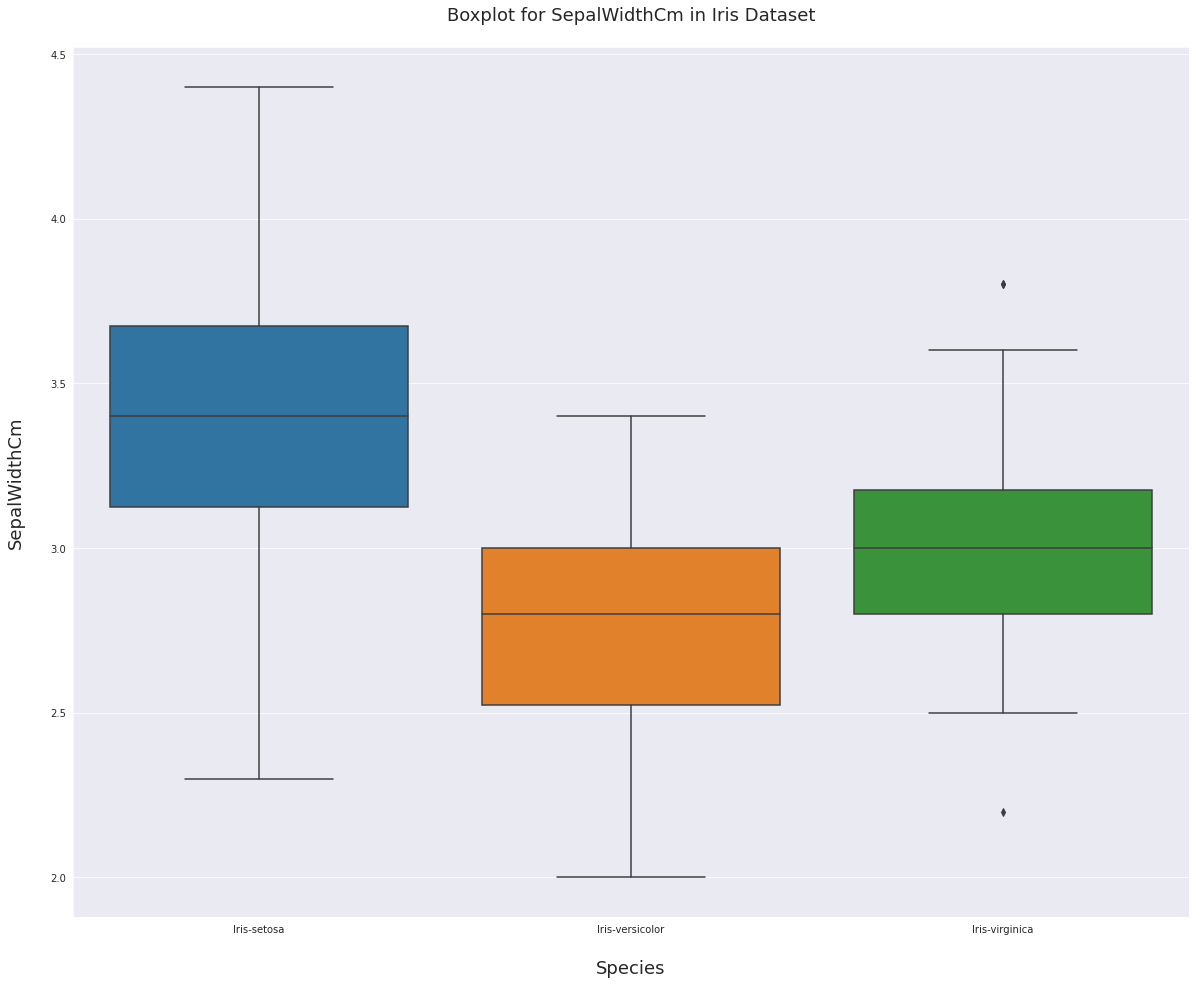

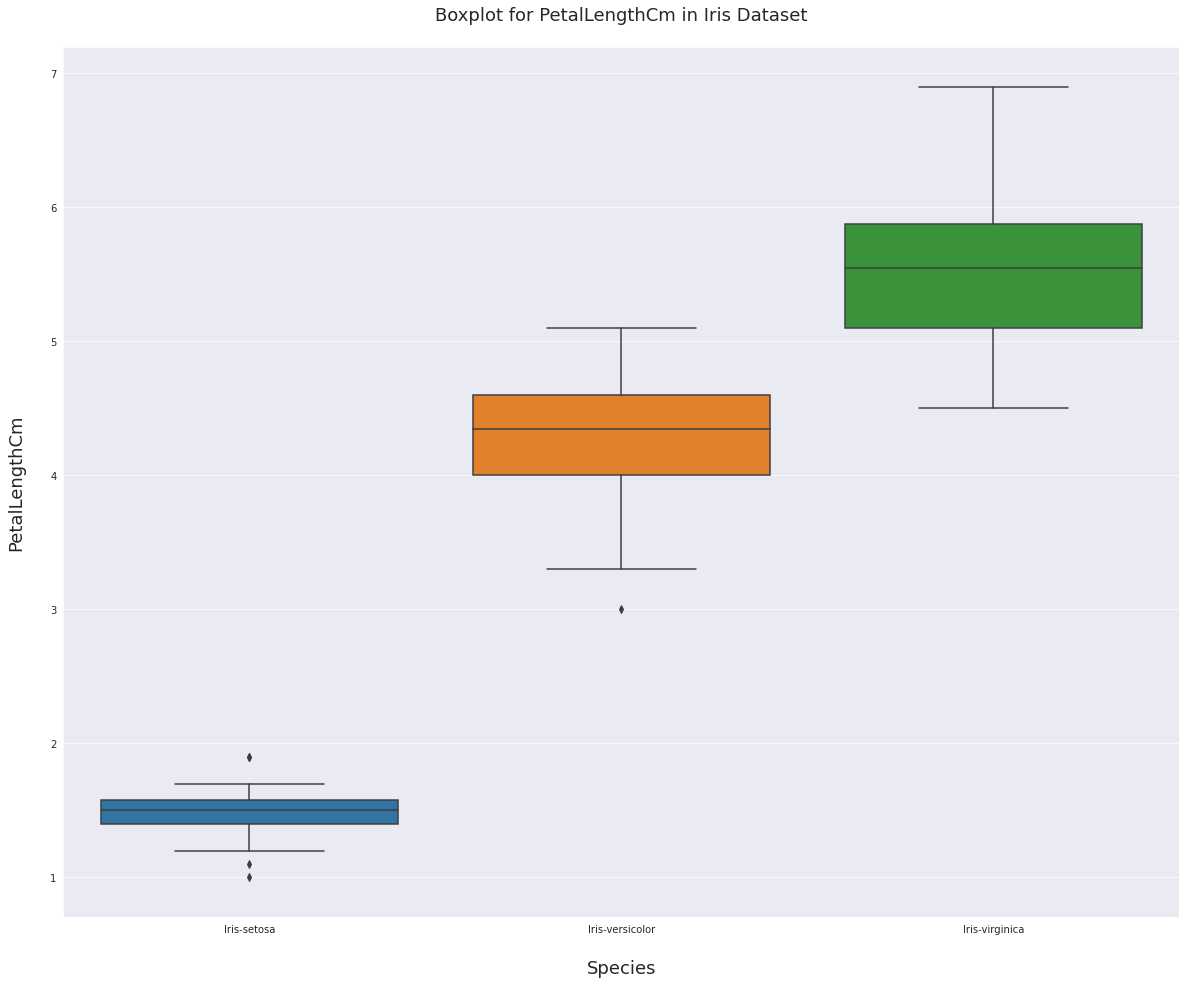

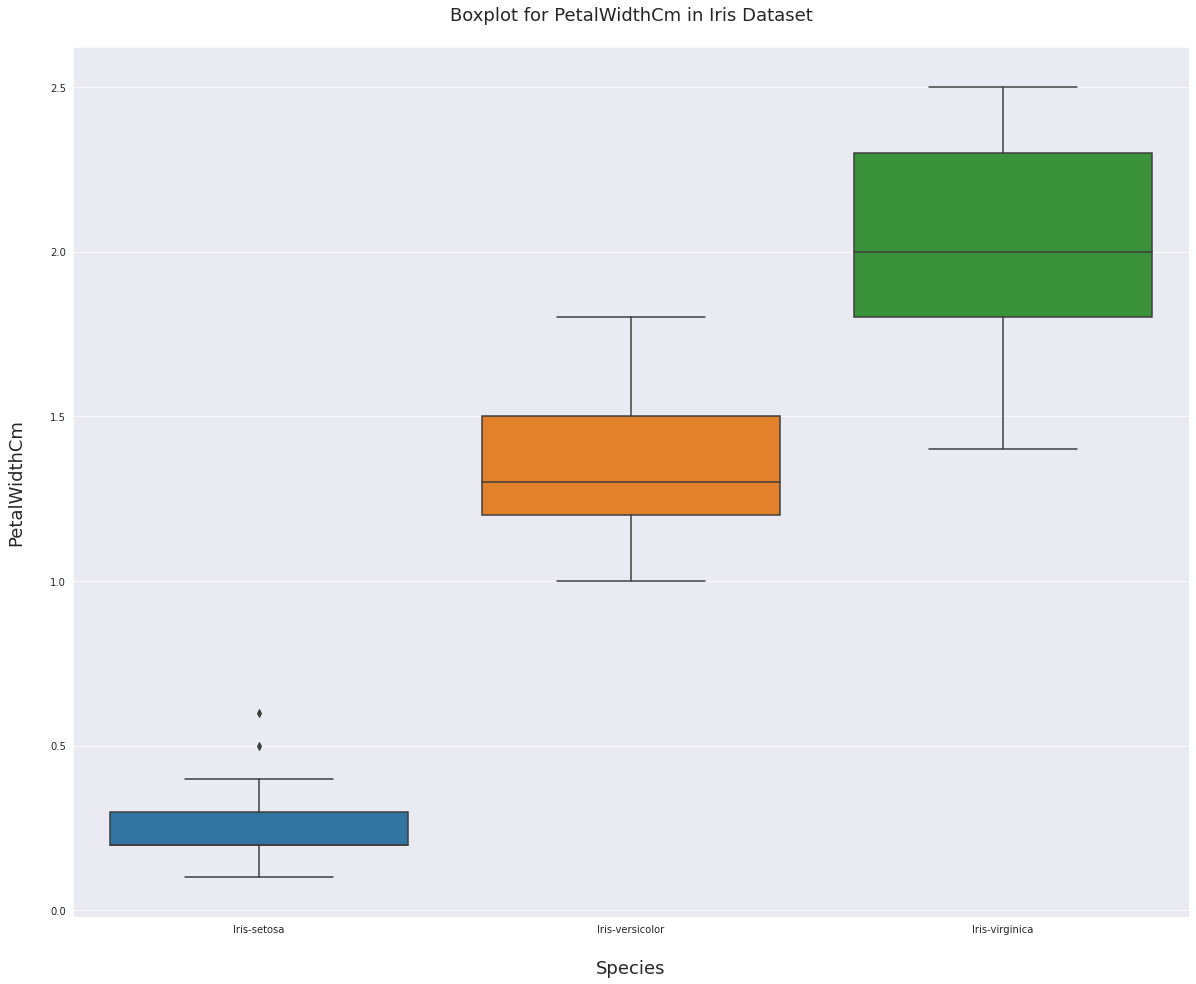

In [7]:
for feature in FEATURES_LIST:
    plot = sns.boxplot(data=dataset, x = 'Species', y = feature)
    plot.set_title(f'Boxplot for {feature} in Iris Dataset\n', fontsize=18)
    plot.set_xlabel('\nSpecies', fontsize=18)
    plot.set_ylabel(feature + '\n', fontsize=18)
    plt.show()

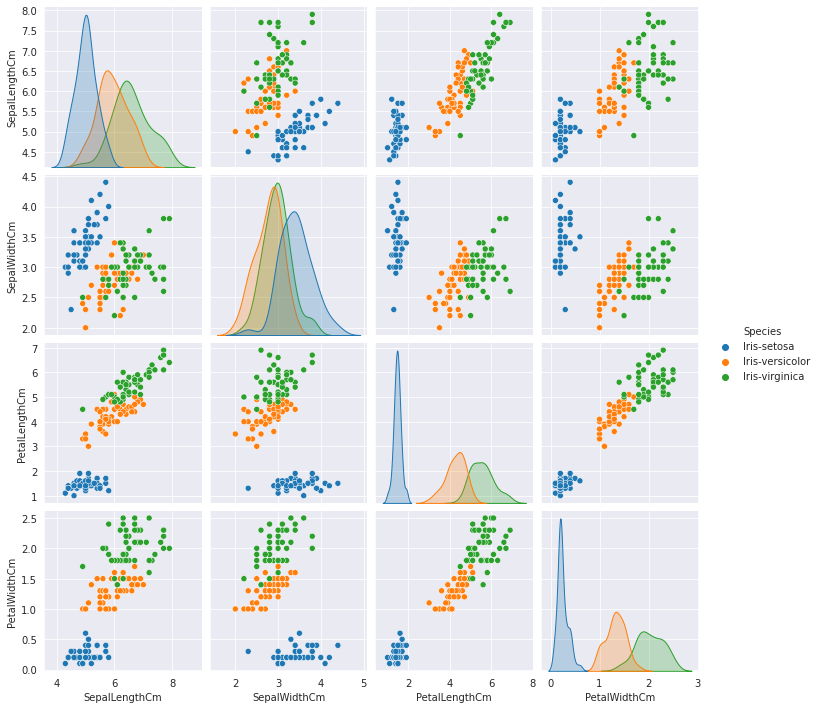

In [8]:
sns.pairplot(data=dataset, hue = 'Species')
plt.show()

In [9]:
# TSNE - 2D
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections,
    x = 0,
    y = 1,
    color = dataset['Species'],
    labels={'color': 'Species'}
)
fig.update_layout(
    title={
        'text': 'Iris Dataset - TSNE 2D Visualization',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [10]:
# UMAP - 2D
umap = UMAP(n_components=2, random_state=0)
projections = umap.fit_transform(X)

fig = px.scatter(
    projections,
    x = 0,
    y = 1,
    color = dataset['Species'],
    labels={'color': 'Species'}
)
fig.update_layout(
    title={
        'text': 'Iris Dataset - UMAP 2D Visualization',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [11]:
# TSNE - 3D
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(X)
fig = px.scatter_3d(
    projections,
    x = 0,
    y = 1,
    z = 2,
    color = dataset['Species'],
    labels = {'color': 'species'}
)
fig.update_layout(
    title={
        'text': 'Iris Dataset - t-SNE 3D Visualization',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [12]:
# UMAP - 3D
umap = UMAP(n_components=3, random_state=0)
projections = umap.fit_transform(X)
fig = px.scatter_3d(
    projections,
    x = 0,
    y = 1,
    z = 2,
    color = dataset['Species'],
    labels = {'color': 'species'}
)
fig.update_layout(
    title={
        'text': 'Iris Dataset - UMAP 3D Visualization',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()